In [2]:

def dfs_edges(G, source=None, depth_limit=None):
    if source is None:
        # edges for all components
        nodes = G
    else:
        # edges for components with source
        nodes = [source]
    visited = set()
    if depth_limit is None:
        depth_limit = len(G)
    for start in nodes:
        if start in visited:
            continue
        visited.add(start)
        degrees = list(G.degree(G[start]))
        degrees.sort(key=lambda i: i[1])
        stack = [(start, depth_limit, map(lambda d: d[0], degrees))]
        while stack:
            parent, depth_now, children = stack[-1]
            try:
                child = next(children)
                if child not in visited:
                    yield parent, child
                    visited.add(child)
                    if depth_now > 1:
                        # sort node by degree, travese from the smallest degree
                        degrees = list(G.degree(G[child]))
                        degrees.sort(key=lambda i: i[1])
                        stack.append((child, depth_now - 1, map(lambda d: d[0], degrees) ))
            except StopIteration:
                stack.pop()


def dfs_successors(G, source=None, depth_limit=None):
    d = defaultdict(list)
    for s, t in dfs_edges(G, source=source, depth_limit=depth_limit):
        d[s].append(t)
    return dict(d)


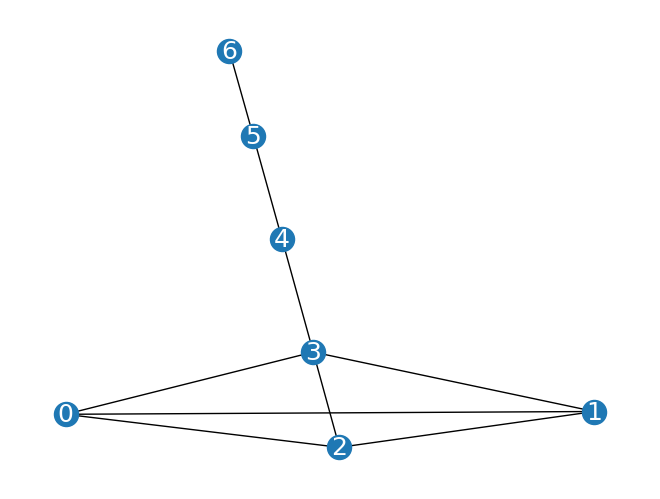

In [3]:
import networkx as nx
G = nx.lollipop_graph(4,3)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_size=18, font_color="w")

In [4]:
p = dict(nx.all_pairs_shortest_path(G))

In [5]:
p[0]

{0: [0],
 1: [0, 1],
 2: [0, 2],
 3: [0, 3],
 4: [0, 3, 4],
 5: [0, 3, 4, 5],
 6: [0, 3, 4, 5, 6]}

In [6]:
def single_source_shortest_paths_pred(graph,source):
    shortest_paths_dict = {}
    pred = nx.predecessor(graph,source)
    for node in graph:
        shortest_paths_dict[node] = list(nx.algorithms.shortest_paths.generic._build_paths_from_predecessors([source], node, pred))
    return shortest_paths_dict

In [7]:
pred=nx.predecessor(G, 4, cutoff=3)

In [8]:
list(nx.algorithms.shortest_paths.generic._build_paths_from_predecessors([4], 8, pred))

NetworkXNoPath: Target 8 cannot be reached from given sources

In [9]:
pred

{4: [], 5: [4], 3: [4], 6: [5], 0: [3], 1: [3], 2: [3]}

In [10]:
dict(nx.bfs_successors(G, 0, 3))

{0: [1, 2, 3], 3: [4], 4: [5]}

In [11]:
dict(nx.dfs_successors(G, 0, 3))

{0: [1], 1: [2], 2: [3]}

In [12]:
dict(enumerate(nx.bfs_layers(G, [0])))

{0: [0], 1: [1, 2, 3], 2: [4], 3: [5], 4: [6]}

In [13]:
list(nx.bfs_tree(G, source=0, depth_limit=3))

[0, 1, 2, 3, 4, 5]

In [14]:
list(nx.bfs_layers(G, 0))

[[0], [1, 2, 3], [4], [5], [6]]

[(0, 1), (1, 2), (2, 3), (3, 4)]

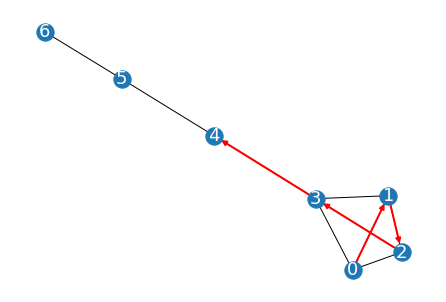

In [303]:
path = list(dfs_edges(G, 0, depth_limit=4))
list(zip(path,path[1:]))
nx.draw(G, pos, with_labels=True, font_size=18, font_color="w")
# nx.draw_networkx_nodes(G,pos,nodelist=path,node_color='r')
nx.draw_networkx_edges(G,pos,edgelist=path,edge_color='r',width=2,arrowstyle='-|>',arrows=True)
path

In [178]:
dict(nx.dfs_successors(G, 0, 4))

{0: [1], 1: [2], 2: [3], 3: [4]}

[(0, 1), (0, 2), (0, 3), (3, 4)]

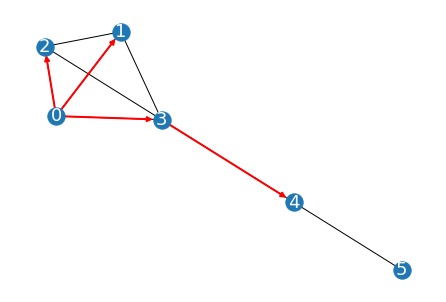

In [179]:
path = list(nx.bfs_edges(G, 0, depth_limit=2))
list(zip(path,path[1:]))
nx.draw(G, pos, with_labels=True, font_size=18, font_color="w")
# nx.draw_networkx_nodes(G,pos,nodelist=path,node_color='r')
nx.draw_networkx_edges(G,pos,edgelist=path,edge_color='r',width=2,arrowstyle='-|>',arrows=True)
path

In [156]:
dict(nx.bfs_successors(G, 0, 3))

{0: [1, 2, 4, 8],
 2: [3],
 4: [5, 6],
 8: [9, 10, 12],
 6: [7],
 10: [11],
 12: [13, 14]}

In [44]:
list(nx.bfs_tree(G, 0, 3))

[0, 1, 5, 2, 6, 3, 7, 4, 8, 9]